# Data Analysis of House Price

## Workflow of Data Processing

**Classifying:** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

## Preparing

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

System environment

In [2]:
import sys
import numpy as np
import scipy as sp
import IPython
import sklearn
import pandas as pd

Data Modelling Libraries

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

ML models

In [4]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

In [5]:
data_raw = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
data_val = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

check the column items

In [6]:
data_raw.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

## analysis 'saleprice'

In [7]:
data_raw['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

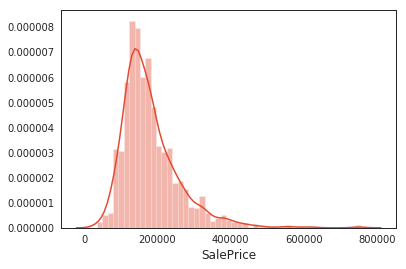

In [8]:
# histogram
sns.distplot(data_raw['SalePrice'])

skewness: s

kurtosis: peakedness

In [9]:
#skewness and kurtosis
print("Skewness: %f" % data_raw['SalePrice'].skew())
print("Kurtosis: %f" % data_raw['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Find Relationship with features

### scatter plot

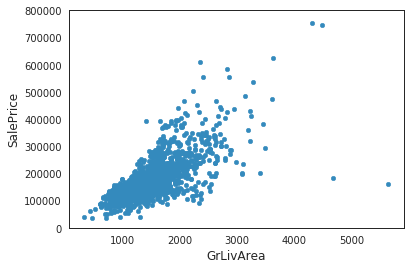

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([data_raw['SalePrice'], data_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

from above we can see the 'linear' correlation between this feature and saleprice. And two outlier points

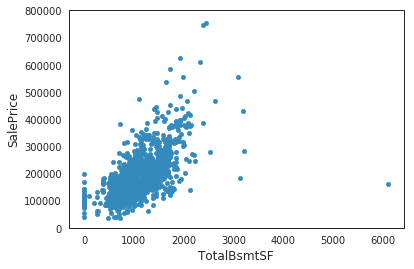

In [11]:
var = 'TotalBsmtSF'
data = pd.concat([data_raw['SalePrice'], data_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

might be strong linear or exponential correlation?

### introduce: Box Plot

![Image of BoxPlot](https://github.com/nilshao/kaggle_startup/blob/master/house_price/for_notebooks/box_plot_intro.png)


**Minimum Score**
The lowest score, excluding outliers (shown at the end of the left whisker).

**Lower Quartile**
Twenty-five percent of scores fall below the lower quartile value (also known as the first quartile).

**Median** 
The median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.

**Upper Quartile**
Seventy-five percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.

**Maximum Score**
The highest score, excluding outliers (shown at the end of the right whisker).

**Whiskers**
The upper and lower whiskers represent scores outside the middle 50% (i.e. the lower 25% of scores and the upper 25% of scores).

**The Interquartile Range (or IQR)**
This is the box plot showing the middle 50% of scores (i.e., the range between the 25th and 75th percentile).

**Outlier** 
For example, outside 1.5 times the interquartile range above the upper quartile and below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

See how the overall qualification grades influence the house price 

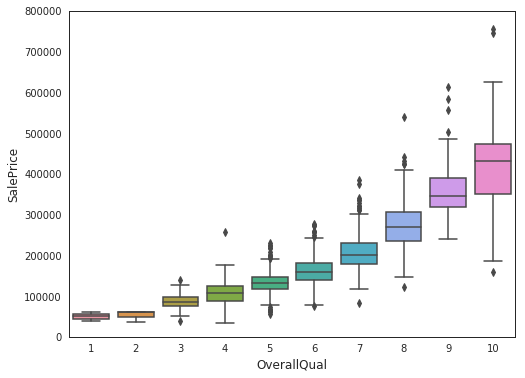

In [12]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([data_raw['SalePrice'], data_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

see how built year influences the price

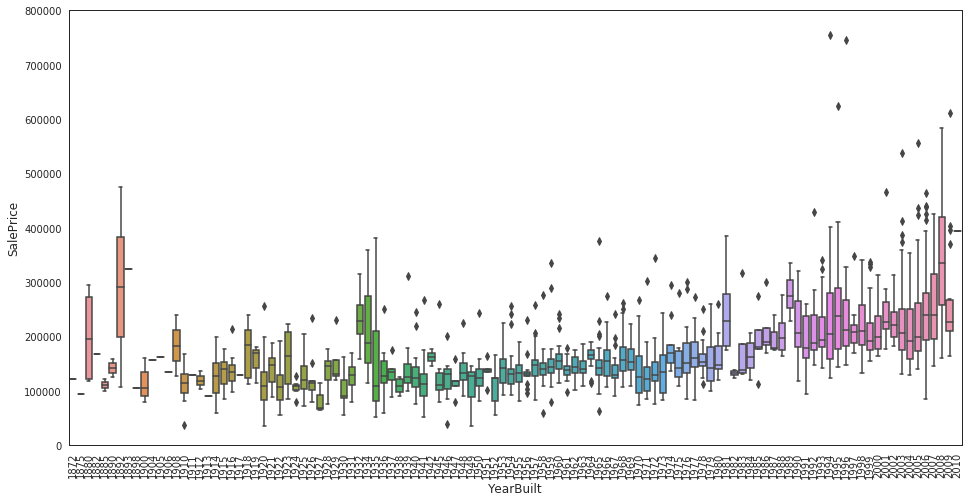

In [13]:
var = 'YearBuilt'
data = pd.concat([data_raw['SalePrice'], data_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Strong correaltion? Weak correlation?

## find correlationship between features

### Introduce Heat Map

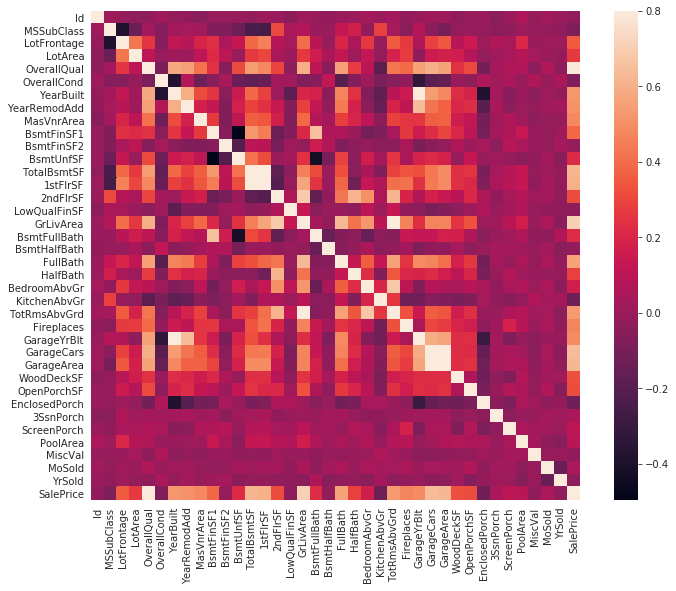

In [14]:
#correlation matrix
corrmat = data_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

TotalBsmtSF' and '1stFlrSF' variables, 'GarageCars' and 'GarageArena' variables have strong Correlationships (almost white)

We can observe which feature as best correlationship with SalePrice. 

Also by checking k largest correlation

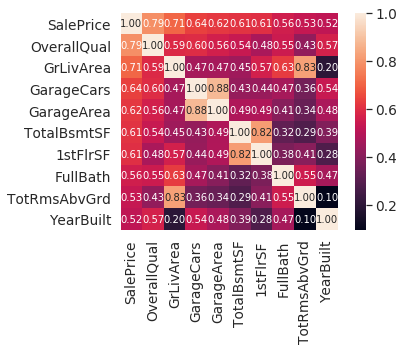

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_raw[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

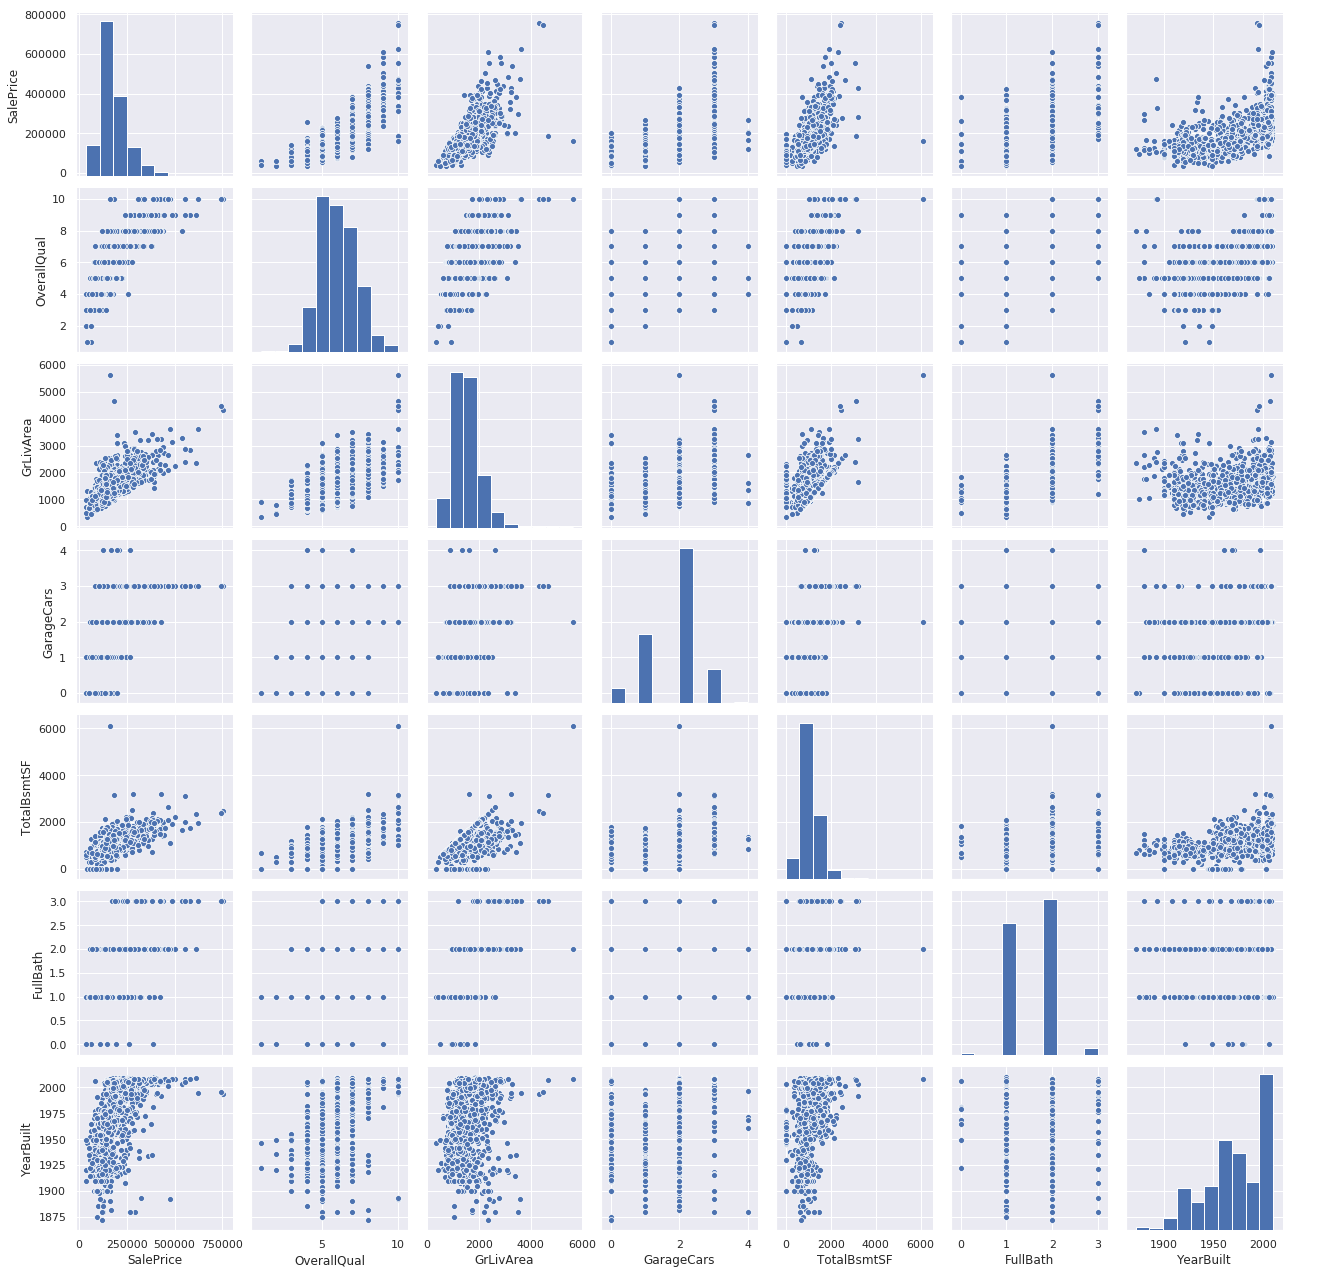

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_raw[cols], size = 2.5)
plt.show();

## Deal with Missing Data

**two questions:**

How prevalent is the missing data?

Is missing data random or does it have a pattern?

In [17]:
total = data_raw.isnull().sum().sort_values(ascending=False)
percent = (data_raw.isnull().sum()/data_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


we can see the missing datas of every features

consider: When 15% more of a feature is missing, maybe we delete the feature, "if" the data is not strongly correlated to the price. And some of these features are big outlier

GarageX Features: strongly correlated to GarageCars. Lets not consider these features. Same with BsmtX.

MasVnrArea' and 'MasVnrType': these variables are not essential and they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Electrica: only one observation, delete this observation and keep the variable

In [18]:
#dealing with missing data
data_raw = data_raw.drop((missing_data[missing_data['Total'] >= 1]).index,1)
#data_raw = data_raw.drop(data_raw.loc[data_raw['Electrical'].isnull()].index)


check that there's no missing data missing...

In [19]:
data_raw.isnull().sum().max() 

0

## Deal with Outliers

Define threshold that defines an observation as outlier. To do so, we standarize the data.In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [45]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data_raw['SalePrice'][:,np.newaxis])


In [46]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


How todeal with the 7.xxx values?

### Bivariate analysis

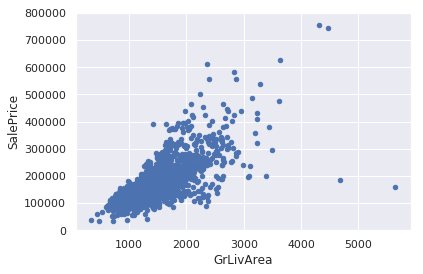

In [47]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([data_raw['SalePrice'], data_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

For special points in this example: 
    
the two values in right-bottom seem to be outlier: we delete them
    
the two values in top: seem to follow the trend: keep them        

In [49]:
#deleting points
data_raw.sort_values(by = 'GrLivArea', ascending = False)[:2]
data_raw = data_raw.drop(data_raw[data_raw['Id'] == 1299].index)
data_raw = data_raw.drop(data_raw[data_raw['Id'] == 524].index)

Plot again!

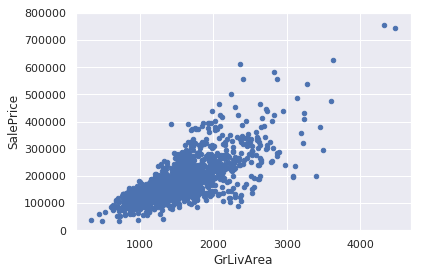

In [50]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([data_raw['SalePrice'], data_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

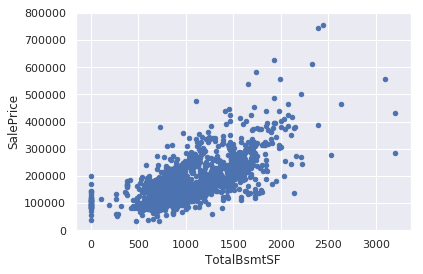

In [51]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([data_raw['SalePrice'], data_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Not worth to delete some or any observations

## Next Step

### check the attributions:

**Normality** When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

**Homoscedasticity** I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

**Linearity** The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

**Absence of correlated errors** Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

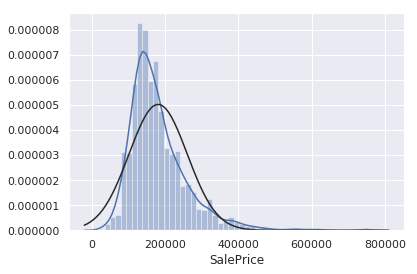

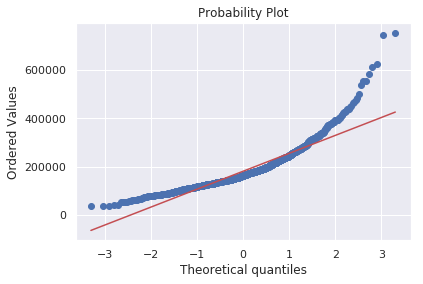

In [54]:
#histogram and normal probability plot
sns.distplot(data_raw['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_raw['SalePrice'], plot=plt)

apply log transformation

In [56]:
data_raw['SalePrice'] = np.log(data_raw['SalePrice'])

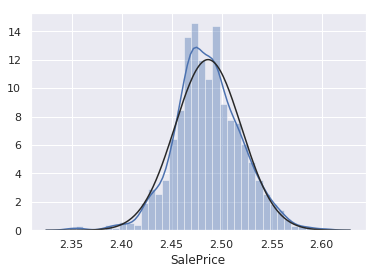

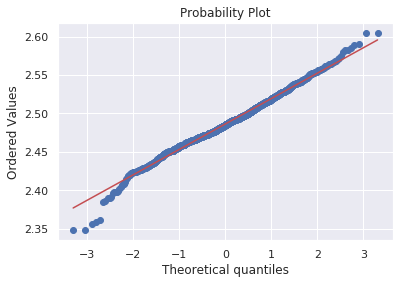

In [57]:
sns.distplot(data_raw['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_raw['SalePrice'], plot=plt)

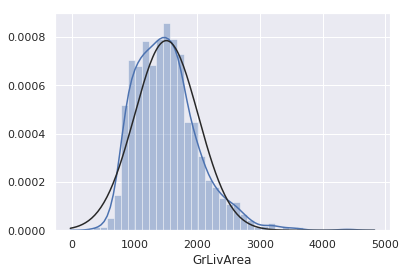

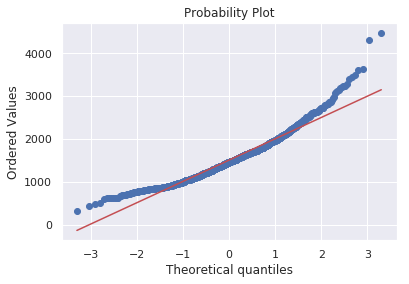

In [58]:
#histogram and normal probability plot
sns.distplot(data_raw['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_raw['GrLivArea'], plot=plt)

In [59]:
data_raw['GrLivArea'] = np.log(data_raw['GrLivArea'])

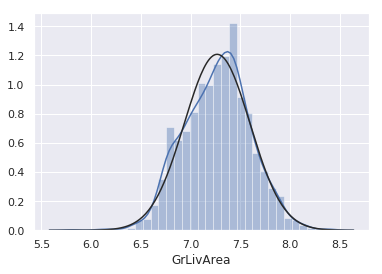

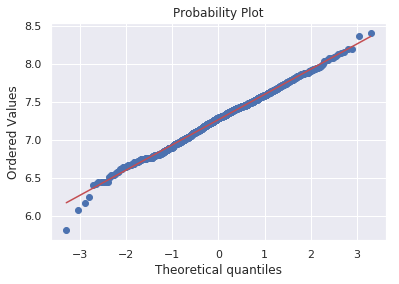

In [60]:
sns.distplot(data_raw['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_raw['GrLivArea'], plot=plt)

Consider why log function deal with skewness and peakness????

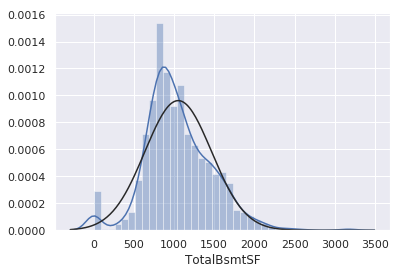

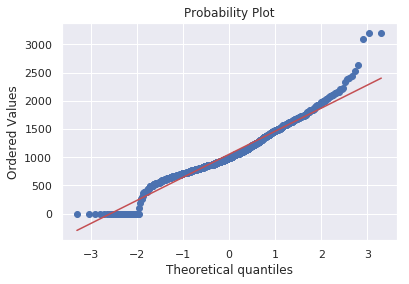

In [61]:
sns.distplot(data_raw['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_raw['TotalBsmtSF'], plot=plt)

Complicate distribution.. generally skewness but with lots of zero values

So: create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [63]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
data_raw['HasBsmt'] = pd.Series(len(data_raw['TotalBsmtSF']), index=data_raw.index)
data_raw['HasBsmt'] = 0 
data_raw.loc[data_raw['TotalBsmtSF']>0,'HasBsmt'] = 1

In [64]:
#transform data
data_raw.loc[data_raw['HasBsmt']==1,'TotalBsmtSF'] = np.log(data_raw['TotalBsmtSF'])

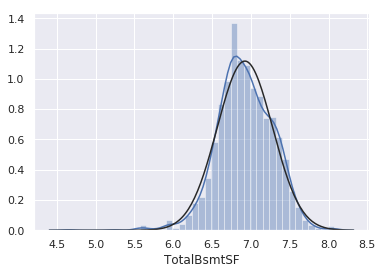

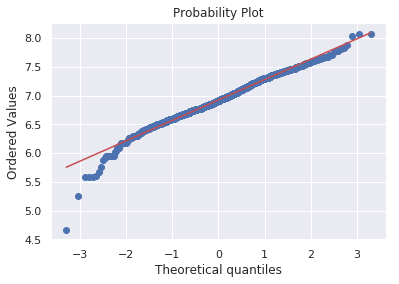

In [67]:
#histogram and normal probability plot
sns.distplot(data_raw[data_raw['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_raw[data_raw['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

Check by homoscedasticity:

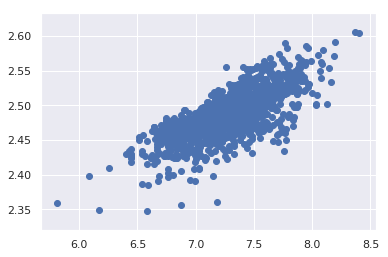

In [68]:
#scatter plot
plt.scatter(data_raw['GrLivArea'], data_raw['SalePrice']);

## Dummy Variables:


In [70]:
#convert categorical variable into dummy
data_raw = pd.get_dummies(data_raw)